<a href="https://colab.research.google.com/github/Dangerdrive/42/blob/main/Medium01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
uploaded = files.upload()

Saving df.csv to df.csv


In [3]:
# import required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# Read data
df = pd.read_csv("df.csv")

df.head()

,index,A,B,C,D,E,F,G,H,I,type
0,0,1.67,16.10,4.42,2.32,101.77,0.88,13.31,0.0,0.00,2
1,1,1.67,16.27,4.64,2.79,101.43,0.96,12.74,0.0,0.00,1
2,2,1.67,17.72,4.88,0.55,100.83,0.04,14.40,0.0,0.00,0
3,3,1.68,15.97,4.65,1.56,100.79,0.18,16.27,0.0,0.05,0
4,4,1.67,15.28,2.41,3.53,101.77,0.90,16.14,0.0,0.00,3


In [5]:
# Number of rows
n_rows = df.shape[1]
n_rows

11

In [6]:
# Column names
column_names = df.columns
column_names

Index(['index', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'type'], dtype='object')

In [7]:
# Dimensions
dimensions = df.shape
dimensions

(214, 11)

In [8]:
# Describle your datas
df.describe()

,index,A,B,C,D,E,F,G,H,I,type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,106.500000,1.670467,16.089626,3.489813,2.745140,101.711215,0.745748,14.330888,0.297710,0.102757,1.542056
std,61.920648,0.003324,0.979979,1.875170,0.948929,1.084305,0.978743,2.276731,0.845669,0.175548,1.707648
min,0.000000,1.660000,12.880000,0.000000,0.550000,97.730000,0.000000,8.690000,0.000000,0.000000,0.000000
25%,53.250000,1.670000,15.490000,2.752500,2.260000,101.190000,0.185000,13.180000,0.000000,0.000000,0.000000
50%,106.500000,1.670000,15.960000,4.520000,2.580000,101.910000,0.830000,13.760000,0.000000,0.000000,1.000000
75%,159.750000,1.670000,16.592500,4.680000,3.100000,102.325000,0.920000,14.677500,0.000000,0.180000,2.000000
max,213.000000,1.690000,20.860000,5.840000,6.650000,105.570000,9.320000,25.900000,5.360000,0.920000,5.000000


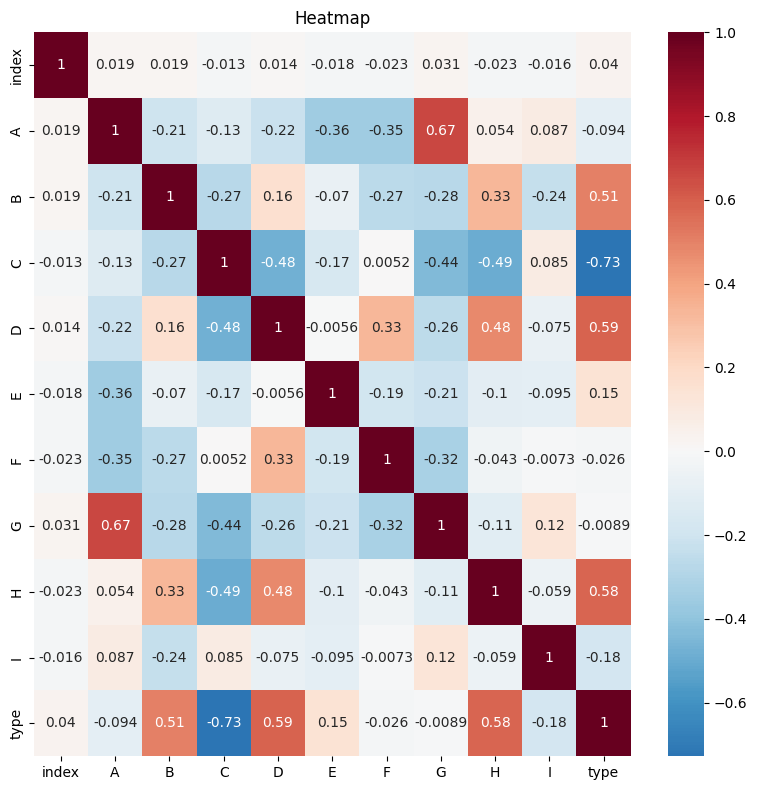

In [9]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(8, 8))
sns.heatmap(corr_matrix, annot=True, cmap='RdBu_r', center=0)
plt.title('Heatmap')
plt.tight_layout()
plt.show()



It's my turn to create my heat map.

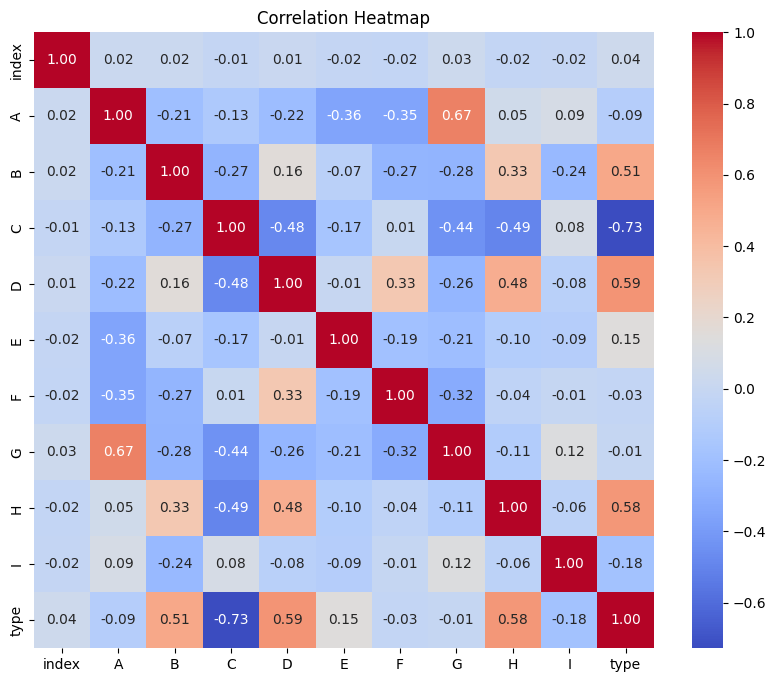

In [10]:
# Drop the 'index' column
df_new = df.drop('index', axis=1)
df_new.head()


,A,B,C,D,E,F,G,H,I,type
0,1.67,16.10,4.42,2.32,101.77,0.88,13.31,0.0,0.00,2
1,1.67,16.27,4.64,2.79,101.43,0.96,12.74,0.0,0.00,1
2,1.67,17.72,4.88,0.55,100.83,0.04,14.40,0.0,0.00,0
3,1.68,15.97,4.65,1.56,100.79,0.18,16.27,0.0,0.05,0
4,1.67,15.28,2.41,3.53,101.77,0.90,16.14,0.0,0.00,3


In [11]:
from sklearn.model_selection import train_test_split

X = df_new.drop('type', axis=1)
y = df_new['type']

# # Training and test data split (70:30)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

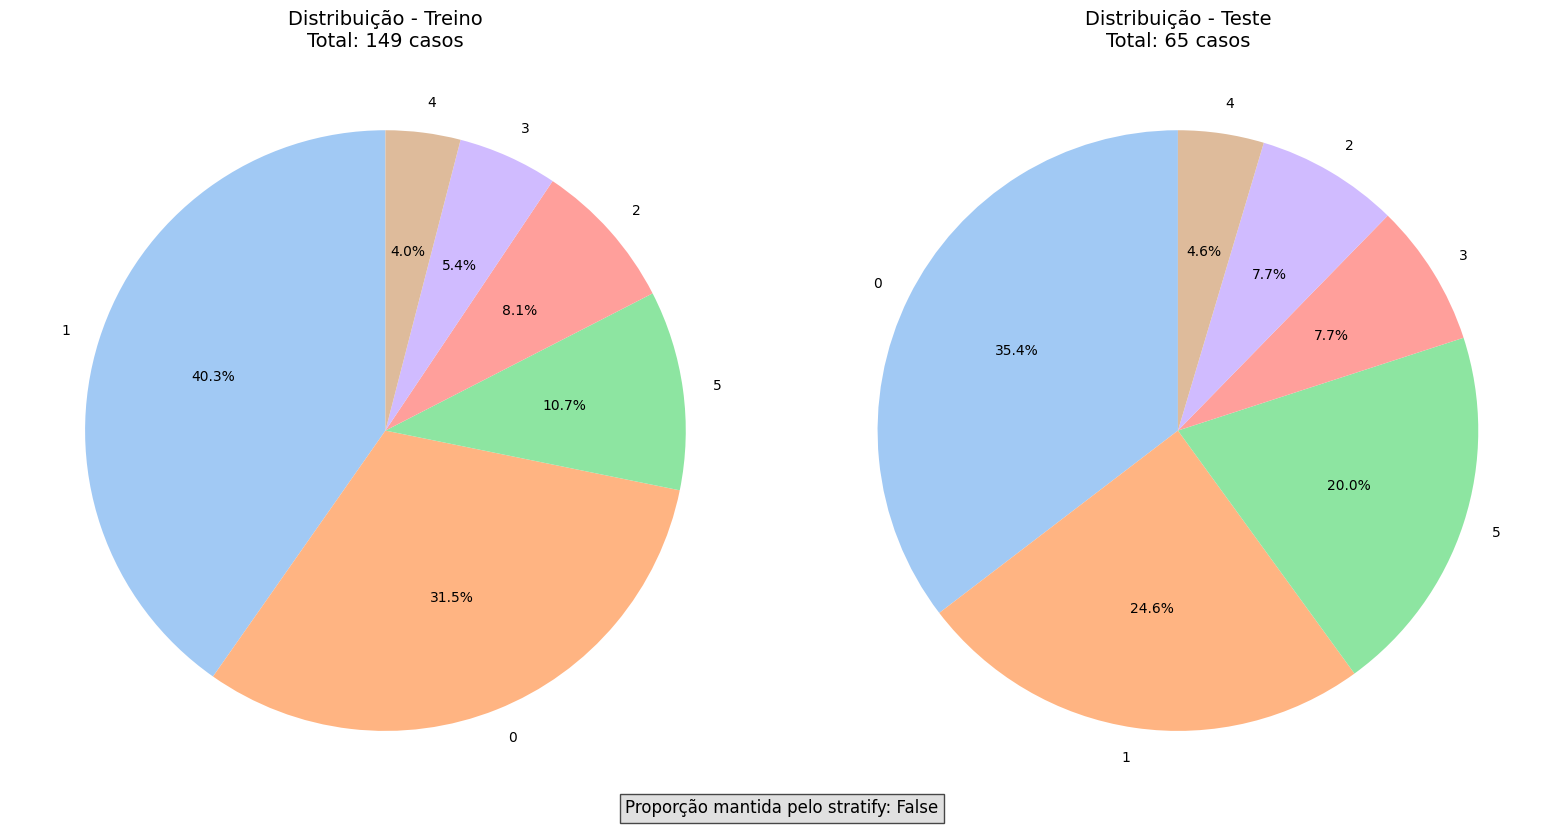

In [12]:
# Display class distribution in training and test data
# Display class distribution
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

# Cores para as classes
colors = sns.color_palette('pastel')[0:len(y_train.unique())]

# Training data
train_counts = y_train.value_counts()
ax1.pie(train_counts, labels=train_counts.index, autopct='%1.1f%%',
        colors=colors, startangle=90)
ax1.set_title(f'Distribuição - Treino\nTotal: {len(y_train)} casos', fontsize=14)

# Test data
test_counts = y_test.value_counts()
ax2.pie(test_counts, labels=test_counts.index, autopct='%1.1f%%',
        colors=colors, startangle=90)
ax2.set_title(f'Distribuição - Teste\nTotal: {len(y_test)} casos', fontsize=14)

# Adicionar informação balanceamento
plt.figtext(0.5, 0.01,
           f"Proporção mantida pelo stratify: {np.allclose(train_counts/len(y_train), test_counts/len(y_test), atol=0.01)}",
           ha='center', fontsize=12, bbox=dict(facecolor='lightgray', alpha=0.7))

plt.tight_layout()
plt.show()

Now it's my turn to create a pie chart with my class distribution data.

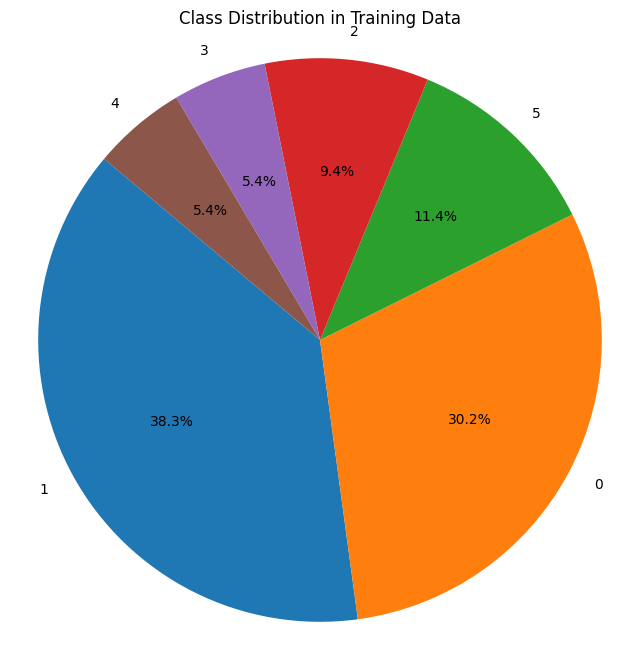

In [13]:
from sklearn.linear_model import LogisticRegression

# Multinomial logistic regression model
# Training the model
logreg = LogisticRegression(multi_class='multinomial', solver='lbfgs', random_state=42, max_iter=1000)

In [14]:
from sklearn.preprocessing import StandardScaler

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [15]:
# Train the model
logreg.fit(X_train_scaled, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=1000, multi_class='multinomial', random_state=42)

In [16]:
# Prediction on the training data
y_train_pred = logreg.predict(X_train_scaled)


In [17]:
# Prediction on the test data
y_test_pred = logreg.predict(X_test_scaled)


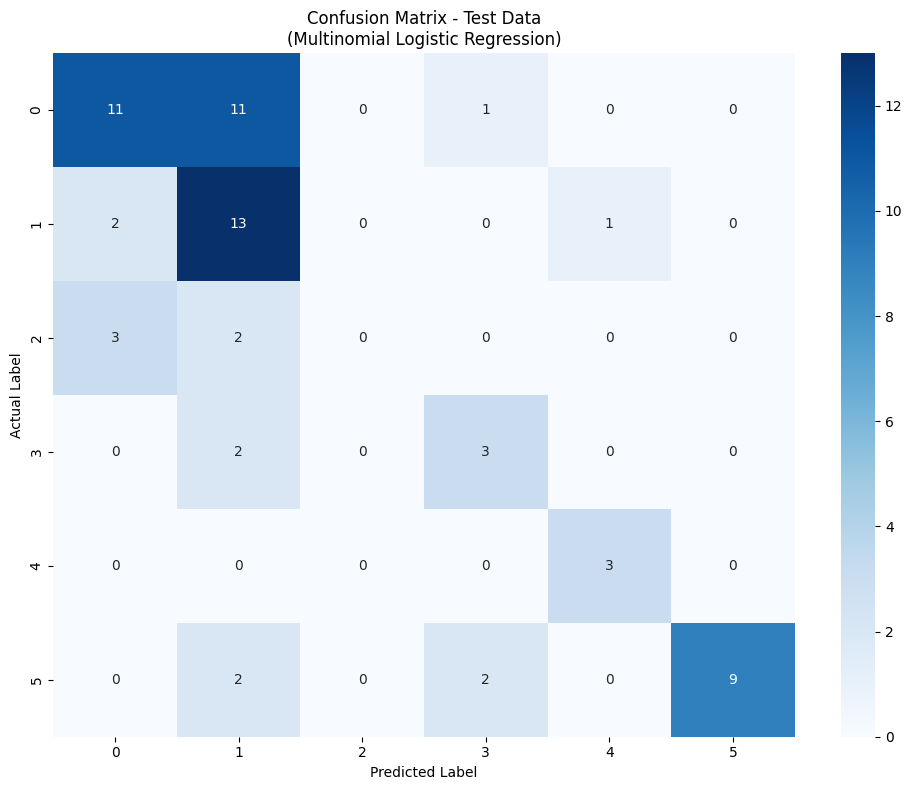

In [18]:
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
train_cm = confusion_matrix(y_train, y_train_pred)
test_cm = confusion_matrix(y_test, y_test_pred)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(test_cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=logreg.classes_,
            yticklabels=logreg.classes_)
plt.title('Confusion Matrix - Test Data\n(Multinomial Logistic Regression)')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

# # Optional: Also show training confusion matrix
# plt.figure(figsize=(10, 8))
# sns.heatmap(train_cm, annot=True, fmt='d', cmap='Greens',
#             xticklabels=logreg.classes_,
#             yticklabels=logreg.classes_)
# plt.title('Confusion Matrix - Training Data\n(Multinomial Logistic Regression)')
# plt.ylabel('Actual Label')
# plt.xlabel('Predicted Label')
# plt.tight_layout()
# plt.show()

It's my turn to create my confusion matrix.

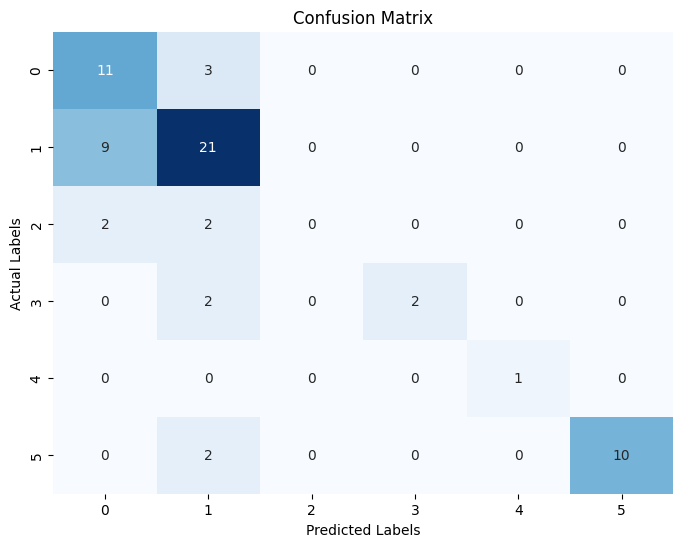

In [19]:
# Print accuracy scores
train_accuracy = logreg.score(X_train_scaled, y_train)
test_accuracy = logreg.score(X_test_scaled, y_test)
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Training Accuracy: 0.7181
Test Accuracy: 0.6000
